In [45]:
# 문장토큰화  SentToken  - 텍스트를 적절한 단위로 잘라 숫자형 아이디 부여  -> 데이터를 의미를 담아 숫자 집합으로 변환하는 임베딩 사전작업
# 기본로직
    # 마침표, 느낌표, 물음표를 문장 끝 후보로 인식
    # 약어 패턴 학습(Dr, Mr, U.S.A 등)
    # 대문자로 시작하는지
    # 통계적 모델을 사용해 진짜 문장 경계인지 판단
# 다국어
# 약어와 실제 문장 끝을 구분하는 기계학습 모델 내장

# 단어토큰화 word_tokenization
    # 공백 기준 단어 분리
    # 구두점을 별도 토큰으로 분리
    # 축약형 처리 it's   it, s
    # 소유격 처리 "Let's" (Let s)

# 구두점 기반 WordPunctTokenizer
# 모든 구두점을 분리
# It's It, ', s

# 정규표현식 RegexpTokenizer

# 노이즈와 불용어 제거
    # set 자료구조
    # List Comprehension
    #  NLTK 불용어사전

In [46]:
%conda install nltk

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [47]:
from nltk.tokenize import sent_tokenize
import nltk

In [48]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
sentence = "Hello everyone. It's good to see you. Let's start our text mining class"
sent_tokenize(sentence)

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text mining class"]

In [50]:
sentence_kor = '안녕하세요, 여러분. 만나서 반갑습니다. 이제 수업을 시작해볼까요?'
sent_tokenize(sentence_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 수업을 시작해볼까요?']

In [51]:
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '수업을', '시작해볼까요', '?']

In [52]:
from nltk.tokenize import WordPunctTokenizer   # 클래스 WordPunctTokenizer : 단어를 좀 더 세밀하게 쪼개서 분석하고 싶을 때 사용
WordPunctTokenizer().tokenize(sentence)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'mining',
 'class']

In [53]:
# 정규식 토큰화
import re
re.findall("[abc]", "how are you")   # 뒤 문장에 있는 글자 중 abc 하나라도 있으면 다 찾아봐라

['a']

In [54]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords    # corpus : 자연언어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합
from nltk.tokenize import RegexpTokenizer
english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to the movie yesterday"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w']+")  # 정규식 토큰화  (괄호 안에 원하는 정규 표현식 넣을 수 있음)  nltk보다 더 내가 원하는 방식으로 세밀하게 만들 수 있음
tokens = tokenizer.tokenize(test1.lower())
[token for token in tokens if token not in english_stops]


['sorry', 'go', 'movie', 'yesterday']

In [55]:
# 소문자 a~z로 이루어진 문자열에서 4글자 이상
RegexpTokenizer("[a-z]{4,}")

RegexpTokenizer("[\\w']{3,}")   # 3글자 이상

RegexpTokenizer("[\\w]")  # 어포스트로피를 패턴에서 제외   can't  can t

RegexpTokenizer(pattern='[\\w]', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [56]:
# 어간 추출(Stemming)
# 줄기 stem   단어에서 불필요한 요소를 제거하고 남는 핵심형태
# 단어는 다양한 형태   복수형 과거형과 같은 시제변환, 복수형
# 단어 통일
    # walk (걷다)  walks, walking walked  --> 어간
    # 먹다    먹 ---> 어간
    # 먹는다 먹었다 ----> '먹-'으로 묶어 컴퓨터가 같은 단어로 인식

from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

('cook', 'cookeri', 'cookbook')

In [57]:
# PorterStemmer : 규칙기반이라 완벽하지 못함 but 속도가 무척 빠름, 의미가 달라질 수도 있음


In [58]:
from nltk.stem import LancasterStemmer   # 더 많은 규칙 적용 but 과도한 축약 위험 가능성
stemmer = LancasterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

('cook', 'cookery', 'cookbook')

In [59]:
# 표제어 추출 Lemmatization
# Lemma 단어의 사전 기본형
# 단어의 변형(시제, 복수, 비교급) 제거하고 사전(headword)에 나오는 정확한 원형으로 바꾸는 과정
# 어간처럼 단어 줄기가 아니라, 맥락과 품사를 고려한 올바른 형태
# better (더 좋은) -> 표제어 good (좋은)
# 먹었다 ---> 먹다(동사 원형)
# 알고리즘 : 형태소 분석기(konlpy)를 사용해 품사(명사, 동사)를 보고 정확히 변환

In [60]:
# 주요목적
    # 어간 추출처럼 대충 줄이지 않고 맥락에 맞는 정확한 단어로 만들어서 NLP 품질 향상
    # 단점 사전에 의존해서 언어/멕락 제한

In [61]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print (lemmatizer.lemmatize('cooking'))  # 기본이 명사로 인식함
print(lemmatizer.lemmatize('cooking', pos = 'v'))

cooking
cook


In [62]:
# n noun(명사)   ---> 기본
# v verb(동사)
# a adjective(형용사)
# r adverb(부사)

In [63]:
lemmatizer.lemmatize('better', pos = 'a')

'good'

In [64]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')
tokens = "hello everyone. It's good to see you. Let's start out text mining class!"
tokens = word_tokenize(tokens)
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('hello', 'NN'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('out', 'RP'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('class', 'NN'),
 ('!', '.')]

In [65]:
# 품사 태그 정보 확인
nltk.download('tagsets_json')
nltk.help.upenn_tagset('VB')   # 명사 동사 형용사 NN VB JJ 

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


In [66]:
# 특정 품사 추출    명사 동사 형용사
tag_lists = ['NN' 'VB', 'JJ']
[word for word, tag in nltk.pos_tag(tokens) if tag in tag_lists]

['good']

In [67]:
# NLTK는 영어기반 --> 한국어 조사분리 불가능, 어미변화처리 불가능
# KoNlpy 

In [68]:
%pip install JPype1
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
sentence ='''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [70]:
# NNP 고유명사... 대부분 고유명사로 잘못 인식
from konlpy.tag import Okt
t = Okt()
print(f'형태소 : {t.morphs(sentence)}')
print(f'명사 : {t.morphs(sentence)}')

형태소 : ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']
명사 : ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']


In [71]:
# 그래프와 워드클라우드

# 1. 데이터 로딩
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # 구텐버그 말뭉치 중 이상한 나라의 앨리스 텍스트 로드
gutenberg.fileids()
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [72]:
# 토큰화 및 전처리
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)
print(len(tokens_alice))

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\\w]{3,}")
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(len(reg_alice))

33535
21221


In [73]:
# 3. 불용어 제거
from nltk.corpus import stopwords
english_stop = set(stopwords.words('english'))
result_alice = [ word for word in reg_alice if word not in english_stops ]
len(result_alice)

12105

In [74]:
# 4. 품사 태깅 및 필터링 : (명사 동사 형용사만)
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_word = [word for word, tag in nltk.pos_tag(reg_alice) if tag in my_tag_set]


In [75]:
from collections import Counter
sorted_word_count = dict( Counter(my_word) )

In [76]:
%conda install wordcloud

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


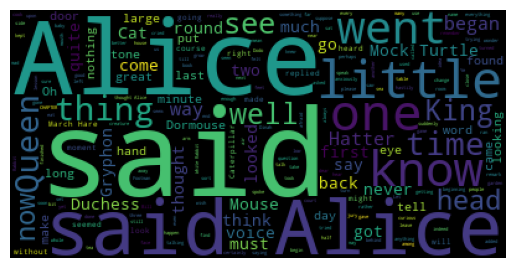

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(doc_alice)
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

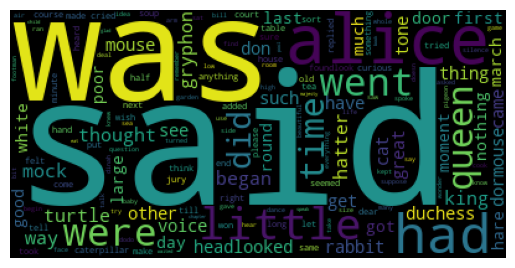

In [78]:
wc = wordcloud.generate_from_frequencies(sorted_word_count) # 빈도
plt.axis('off')
plt.imshow(wc)
plt.show()

카운트 기반 문서 표현 방법 Bag of Words, TF-IDF

In [79]:
# 영화 리뷰 데이터셋 로드
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
# 데이터셋 구조 확인
from nltk.corpus import movie_reviews
print(f'review count : {len(movie_reviews.fileids())}')
print(f'categories of reviews : {movie_reviews.categories()}')


review count : 2000
categories of reviews : ['neg', 'pos']


In [81]:
# BOW 카운트 백터 생성
# 수동 구현
documents = [movie_reviews.words(fileid) for fileid in movie_reviews.fileids()]
documents[:3]

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...],
 ['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...],
 ['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...]]

In [82]:
# 단어 빈도 계산
word_count = {}
for text in documents :
    for word in text :
        word_count[word] = word_count.get(word,0) + 1
sorted_features = sorted(word_count.items(), key = lambda x : x[1], reverse = True)

In [83]:
sorted_features

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961),
 ('his', 9587),
 ('this', 9578),
 ('film', 9517),
 ('i', 8889),
 ('he', 8864),
 ('but', 8634),
 ('on', 7385),
 ('are', 6949),
 ('t', 6410),
 ('by', 6261),
 ('be', 6174),
 ('one', 5852),
 ('movie', 5771),
 ('an', 5744),
 ('who', 5692),
 ('not', 5577),
 ('you', 5316),
 ('from', 4999),
 ('at', 4986),
 ('was', 4940),
 ('have', 4901),
 ('they', 4825),
 ('has', 4719),
 ('her', 4522),
 ('all', 4373),
 ('?', 3771),
 ('there', 3770),
 ('like', 3690),
 ('so', 3683),
 ('out', 3637),
 ('about', 3523),
 ('up', 3405),
 ('more', 3347),
 ('what', 3322),
 ('when', 3258),
 ('which', 3161),
 ('or', 3148),
 ('she', 3141),
 ('their', 3122),
 (':', 3042),
 ('some', 2985),
 ('just', 2905),
 ('can'

In [84]:
# 전처리 및 재계산
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer("[\\w']{3,}")
english_stops = set(stopwords.words('english'))
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids() ]
tokens = [ [token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents ]


In [85]:
word_count = {}
for text in tokens :
    for word in text :
        word_count[word] = word_count.get(word,0) + 1  # get -> key값 (여기서는 word) 있으면 key값, 없으면 default (여기서는 0) 출력
sorted_features = sorted(word_count, key = word_count.get, reverse = True)
for word in sorted_features[:10] :
    print(f"{word} : {word_count[word]}")

film : 8935
one : 5791
movie : 5538
like : 3690
even : 2564
time : 2409
good : 2407
story : 2136
would : 2084
much : 2049


In [86]:
%conda install scikit-learn

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [87]:
# CountVectorizer  문서를 벡터화
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=sorted_features)
cv

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [88]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe